<a href="https://colab.research.google.com/github/sahilr005/ml/blob/main/Game_WIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
- Create a predictive model which is an attempt to predict the win probability
of the Pubg match and to look at the important factors affecting the win probability of the pubg game.

DataSet :- https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1012-GameWinnerPred.zip

In [1]:

# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [43]:
# read Dataset

pd.set_option("display.max_columns",None)
data = pd.read_csv("pubg.csv")
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [3]:
data.shape

(28274, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28274 entries, 0 to 28273
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               28274 non-null  object 
 1   groupId          28274 non-null  object 
 2   matchId          28273 non-null  object 
 3   assists          28273 non-null  float64
 4   boosts           28273 non-null  float64
 5   damageDealt      28273 non-null  float64
 6   DBNOs            28273 non-null  float64
 7   headshotKills    28273 non-null  float64
 8   heals            28273 non-null  float64
 9   killPlace        28273 non-null  float64
 10  killPoints       28273 non-null  float64
 11  kills            28273 non-null  float64
 12  killStreaks      28273 non-null  float64
 13  longestKill      28273 non-null  float64
 14  matchDuration    28273 non-null  float64
 15  matchType        28273 non-null  object 
 16  maxPlace         28273 non-null  float64
 17  numGroups   

In [5]:
# null value check

data.isnull().sum()

Id                 0
groupId            0
matchId            1
assists            1
boosts             1
damageDealt        1
DBNOs              1
headshotKills      1
heals              1
killPlace          1
killPoints         1
kills              1
killStreaks        1
longestKill        1
matchDuration      1
matchType          1
maxPlace           1
numGroups          1
rankPoints         1
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

In [6]:
# only one data is null so it's removed
data.dropna(inplace=True)

data["matchType"].value_counts()

squad-fpp           11109
duo-fpp              6460
squad                4014
solo-fpp             3406
duo                  1965
solo                 1101
normal-squad-fpp      102
crashfpp               50
normal-duo-fpp         32
flaretpp               12
normal-solo-fpp        10
flarefpp                7
normal-squad            3
normal-duo              1
crashtpp                1
Name: matchType, dtype: int64

In [7]:
# removed unwanted data

data.drop(["Id","groupId","matchId"],axis=1,inplace=True)

In [8]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000,28273.000000
mean,0.234959,1.133378,130.991348,0.663354,0.224065,1.380328,47.390655,508.594808,0.927776,0.548545,22.703347,1577.495667,44.405369,42.915891,886.883139,0.163973,609.767937,0.003325,4.550483,0.024546,0.007887,1162.141377,3.681392,611.518799,0.475613
std,0.582904,1.734276,169.609968,1.155341,0.581366,2.675301,27.436504,627.404446,1.545967,0.718510,49.446565,258.041807,23.684775,23.155229,738.124776,0.465407,1490.926405,0.077014,31.926518,0.171440,0.090829,1182.695784,2.393708,740.341363,0.307237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,312.000000,3.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.400000,2.000000,0.000000,0.204100
50%,0.000000,0.000000,83.080000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,1436.000000,30.000000,30.000000,1444.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,708.900000,3.000000,0.000000,0.464300
75%,0.000000,2.000000,186.500000,1.000000,0.000000,2.000000,71.000000,1175.000000,1.000000,1.000000,21.630000,1849.000000,49.000000,47.000000,1500.000000,0.000000,6.892000,0.000000,0.000000,0.000000,0.000000,1968.000000,5.000000,1495.000000,0.744200
max,9.000000,14.000000,2856.000000,32.000000,9.000000,47.000000,100.000000,2069.000000,24.000000,7.000000,624.200000,2217.000000,100.000000,100.000000,5289.000000,8.000000,17210.000000,5.000000,1220.000000,4.000000,2.000000,13530.000000,43.000000,1906.000000,1.000000


In [9]:
# Corelation between depandend value & target value
 
data.corr()["winPlacePerc"].sort_values(ascending=False)

winPlacePerc       1.000000
walkDistance       0.810612
boosts             0.635721
weaponsAcquired    0.598665
damageDealt        0.441846
heals              0.432880
kills              0.421768
longestKill        0.409549
killStreaks        0.375279
rideDistance       0.340593
assists            0.301809
headshotKills      0.283751
DBNOs              0.276276
revives            0.243714
swimDistance       0.140302
vehicleDestroys    0.071879
numGroups          0.044729
maxPlace           0.041300
roadKills          0.031141
teamKills          0.020540
rankPoints         0.015470
killPoints         0.010066
winPoints          0.005856
matchDuration     -0.002234
killPlace         -0.717371
Name: winPlacePerc, dtype: float64

# EDA & Feature Enginering

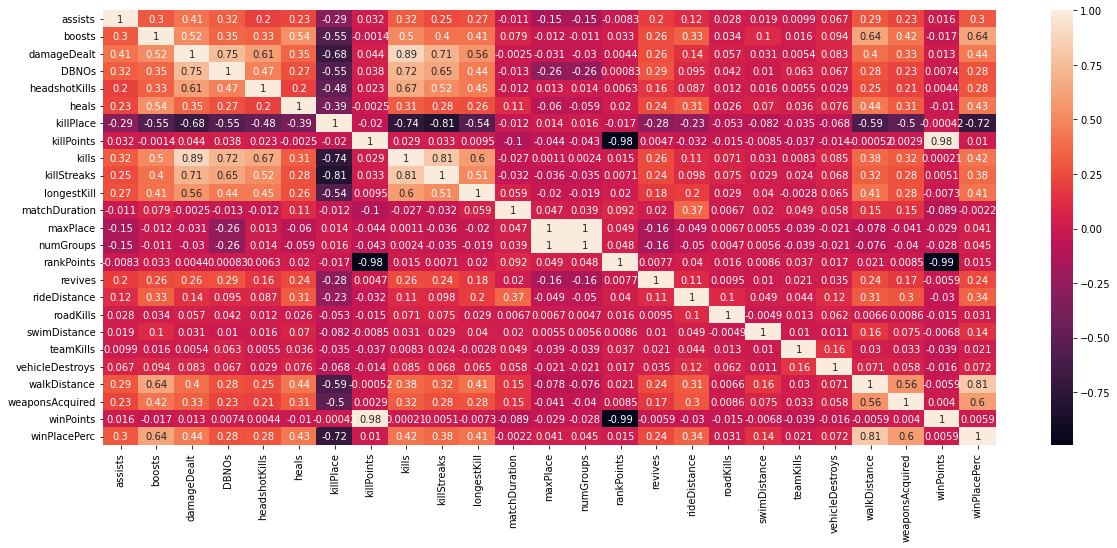

In [10]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

**Continue & Discrete Data**

In [11]:
continue_data = []
discrete_data = []
for i in data.columns:
  if len(data[i].unique()) >20:
    continue_data.append(data[i])
  else:
    discrete_data.append(data[i])

In [12]:
continue_data = pd.DataFrame(continue_data).T
discrete_data = pd.DataFrame(discrete_data).T

In [13]:
continue_data.head(2)

,damageDealt,heals,killPlace,killPoints,kills,longestKill,matchDuration,maxPlace,numGroups,rankPoints,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.00,0.0,60.0,1241.0,0.0,0.0,1306.0,28.0,26.0,-1.0,0.0000,0.00,244.8,1.0,1466.0,0.4444
1,91.47,0.0,57.0,0.0,0.0,0.0,1777.0,26.0,25.0,1484.0,0.0045,11.04,1434.0,5.0,0.0,0.6400


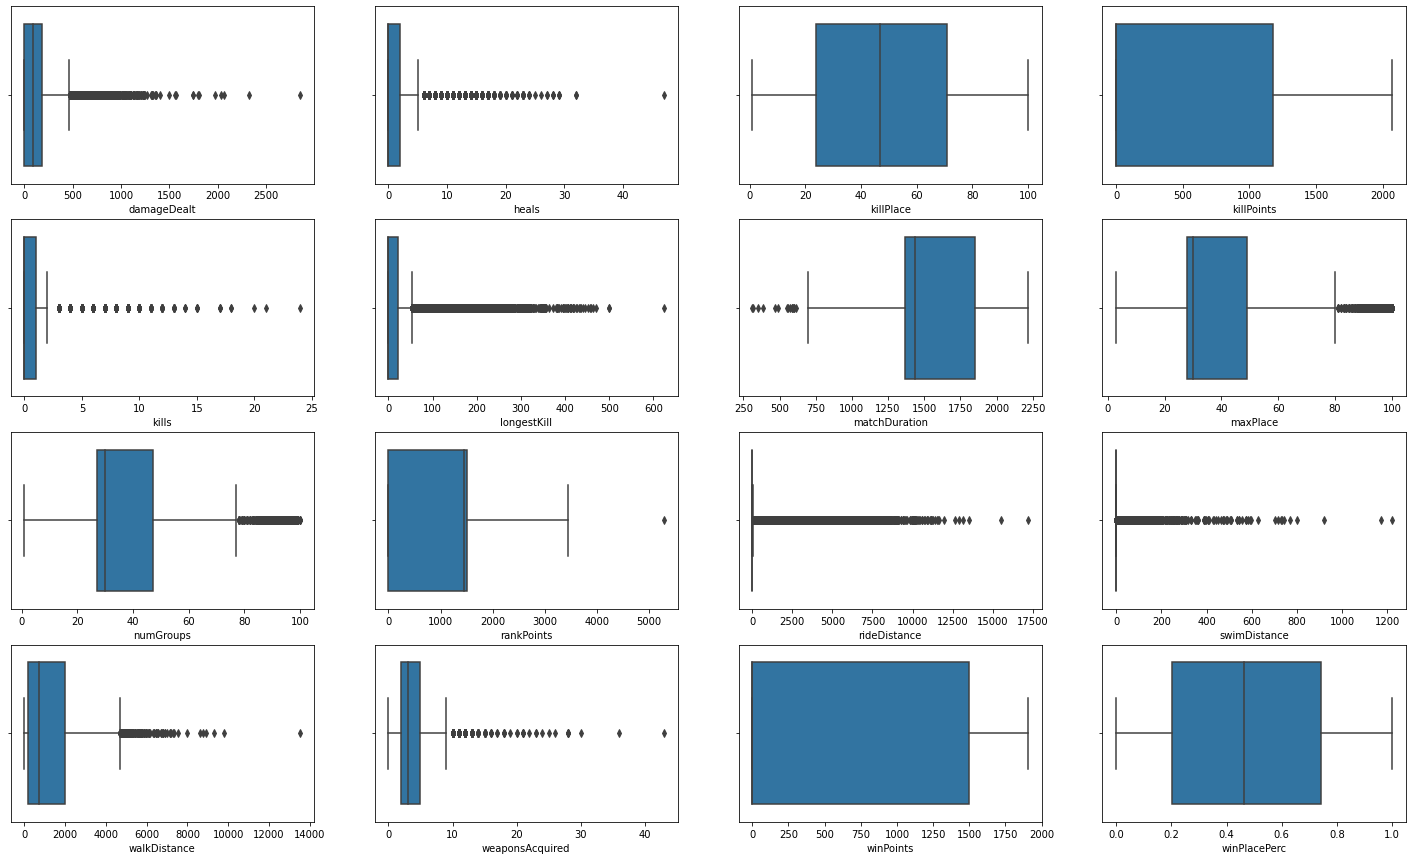

In [14]:
plt.figure(figsize=(25,15))
for i in range(len(continue_data.columns)):
  plt.subplot(4, 4, i + 1)
  sns.boxplot(data[continue_data.columns[i]])
plt.show()

- damageDealt, heals, longestKill, rankPoints data has outliers

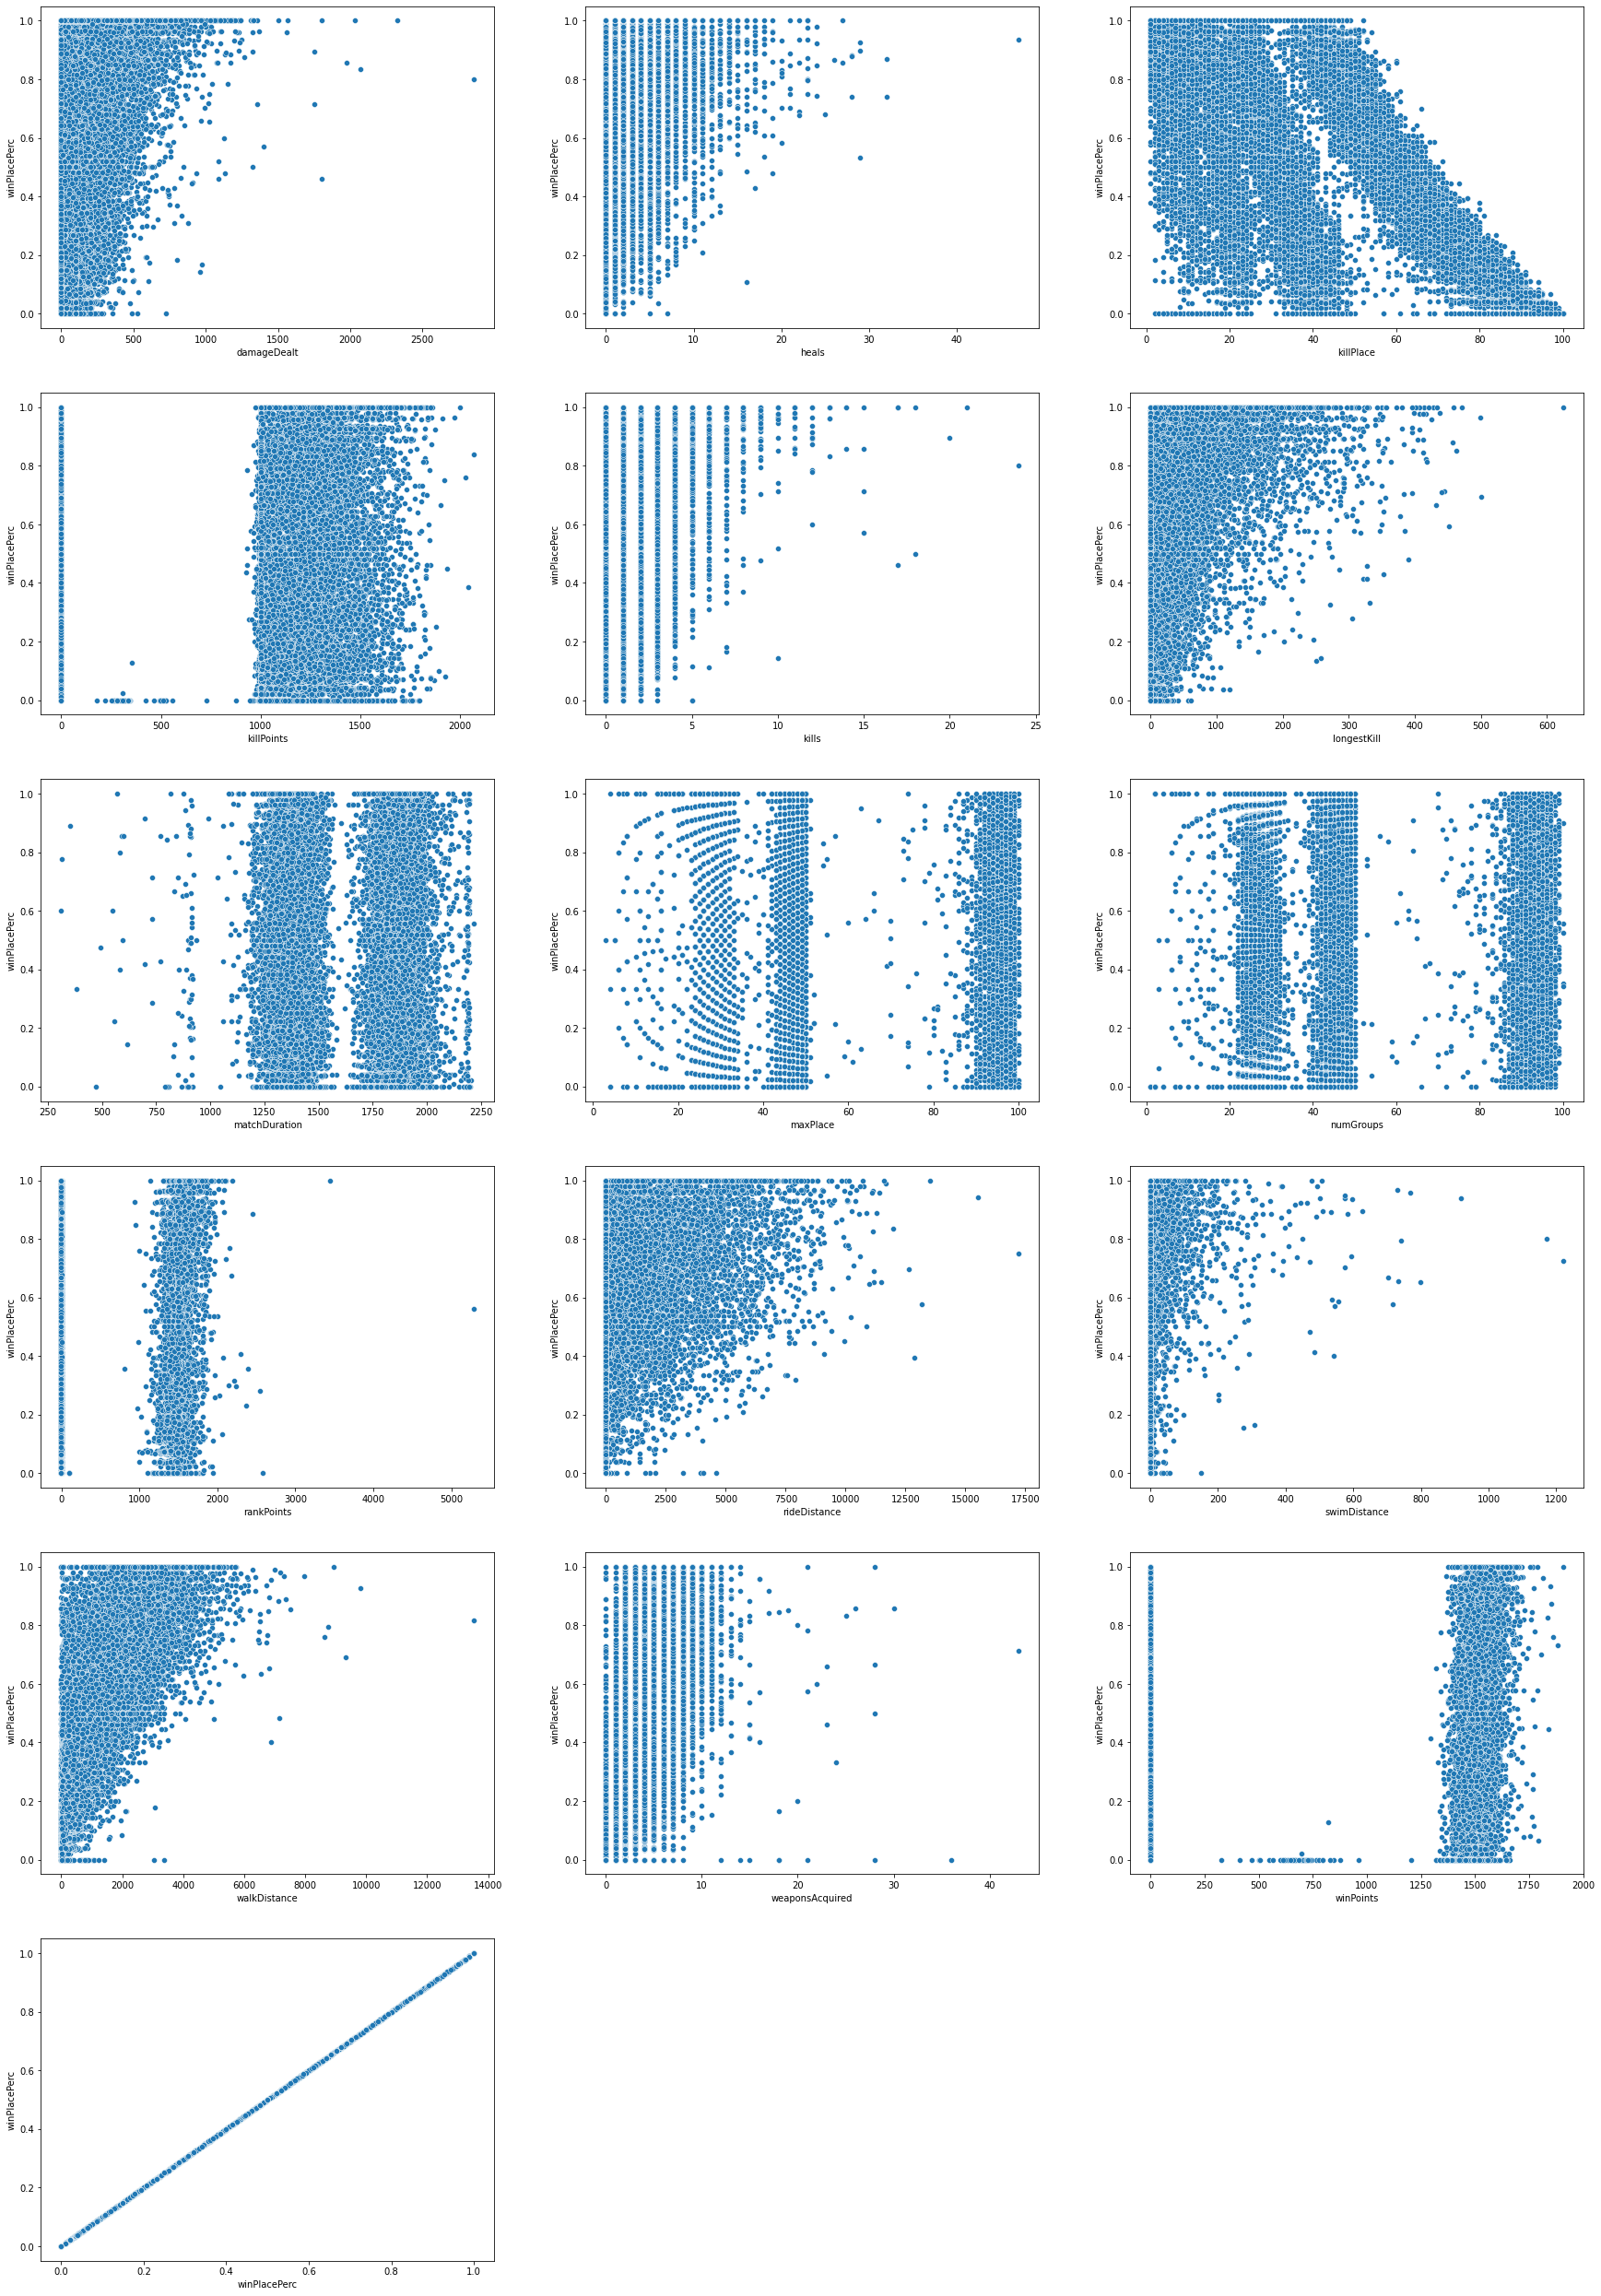

In [15]:
# Probability between continue valu & target value

plt.figure(figsize=(30,45))
for i in range(len(continue_data.columns)):
  plt.subplot(6, 3, i + 1)
  sns.scatterplot(x =data[continue_data.columns[i]], y = data["winPlacePerc"])
plt.show()

Discrete data

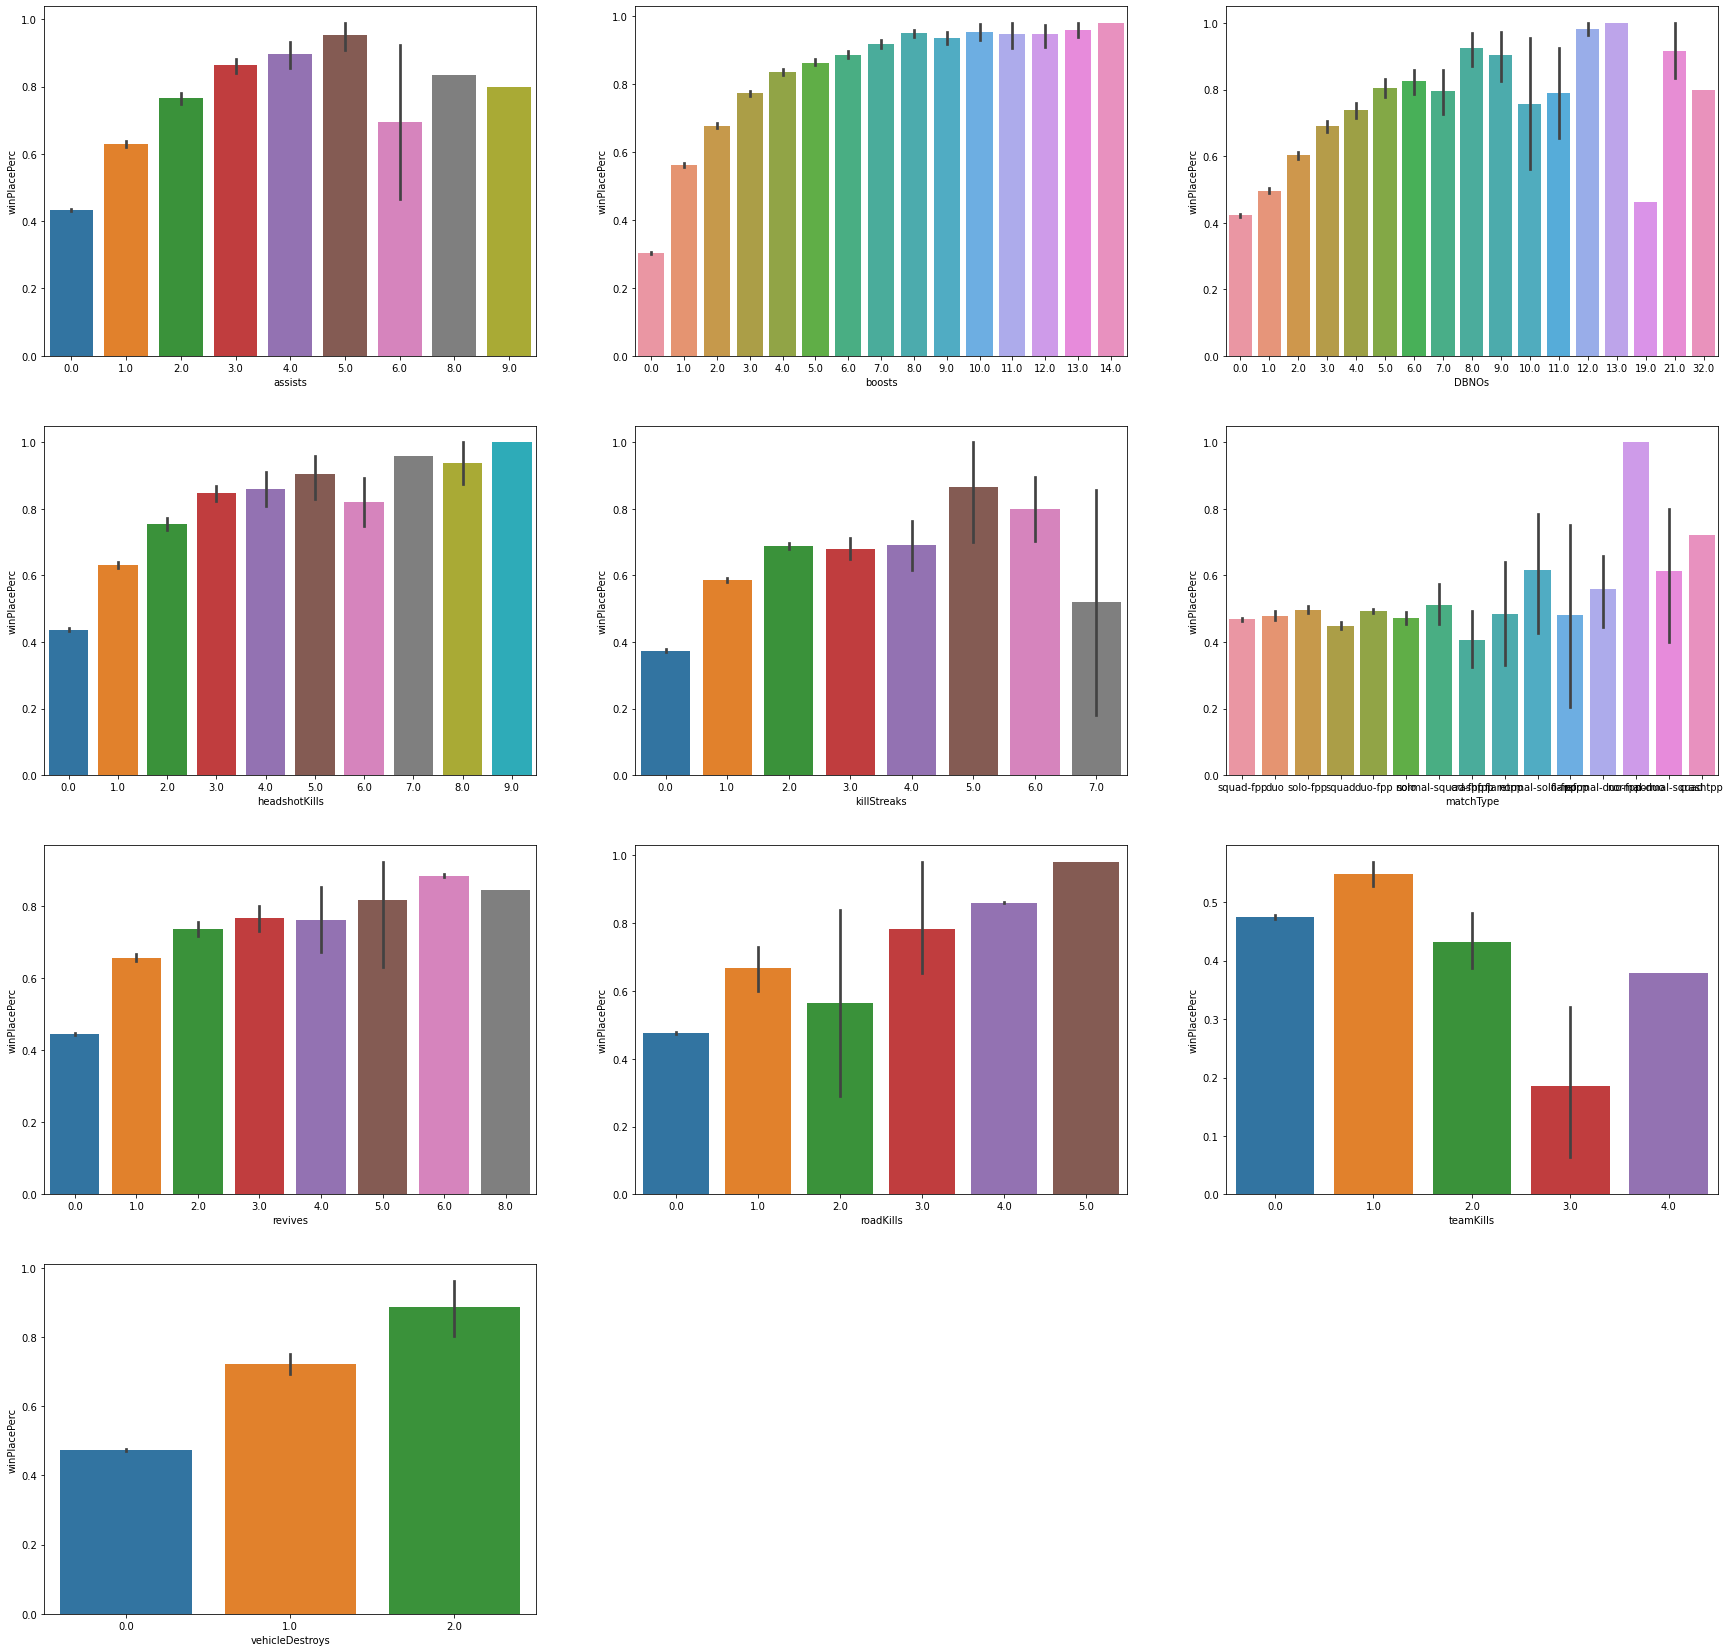

In [16]:
# Probability between discreate valu & target value

plt.figure(figsize=(30,45))
for i in range(len(discrete_data.columns)):
  plt.subplot(6, 3, i + 1)
  sns.barplot(x =data[discrete_data.columns[i]], y = data["winPlacePerc"])
plt.show()

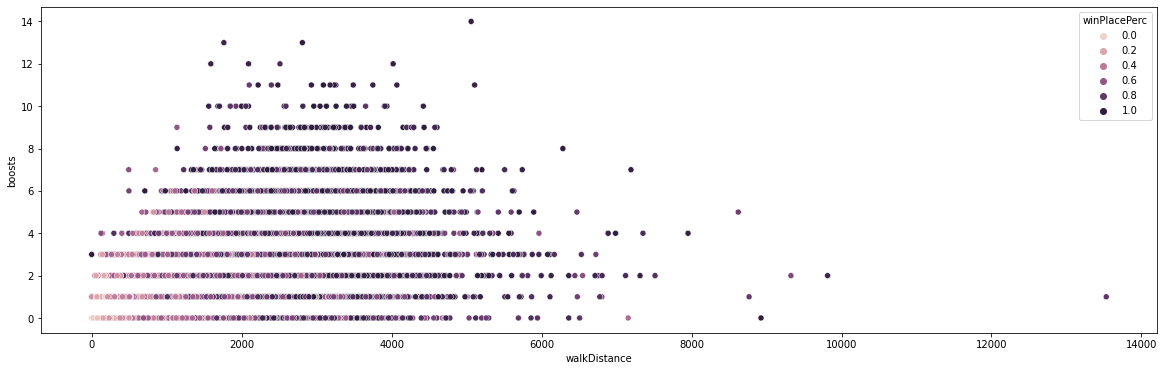

In [17]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=data,x="walkDistance",y="boosts",hue="winPlacePerc")

- when walk Distance & boosts is high then win probability is high

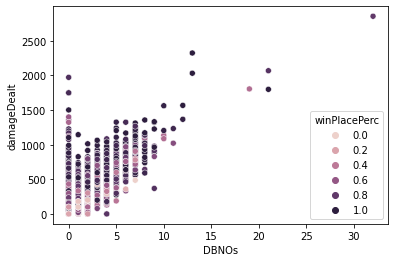

In [18]:
sns.scatterplot(x=data["DBNOs"],y=data['damageDealt'],hue=data["winPlacePerc"])

- DBNOs & damage Dealt is linearly correlated with winning place probability


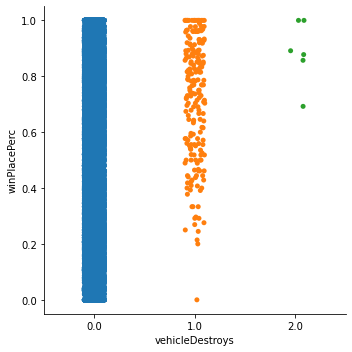

In [19]:
sns.catplot(data=data,x="vehicleDestroys",y="winPlacePerc")

- if 2 vehicale Destroys then wining probability is high

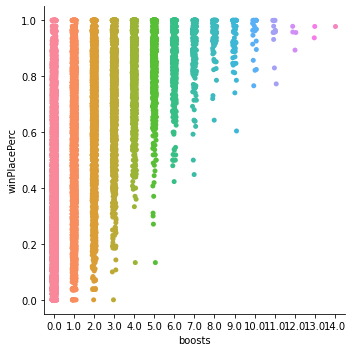

In [20]:
sns.catplot(data=data,x="boosts",y="winPlacePerc")

- if Boost is greater than 8 winning probability is greater than 60%
- booster is above 10 then it will be a winner

<Figure size 1080x1080 with 0 Axes>

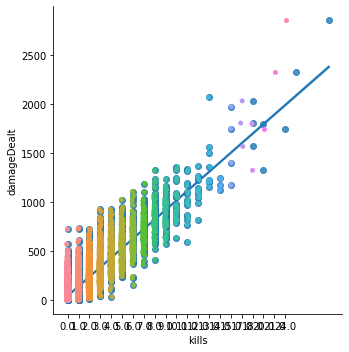

In [21]:
plt.figure(figsize=(15,15))
sns.catplot(data=data,x="kills",y="damageDealt")
sns.regplot(data=data,x="kills",y="damageDealt")

- More kills more wining probebality


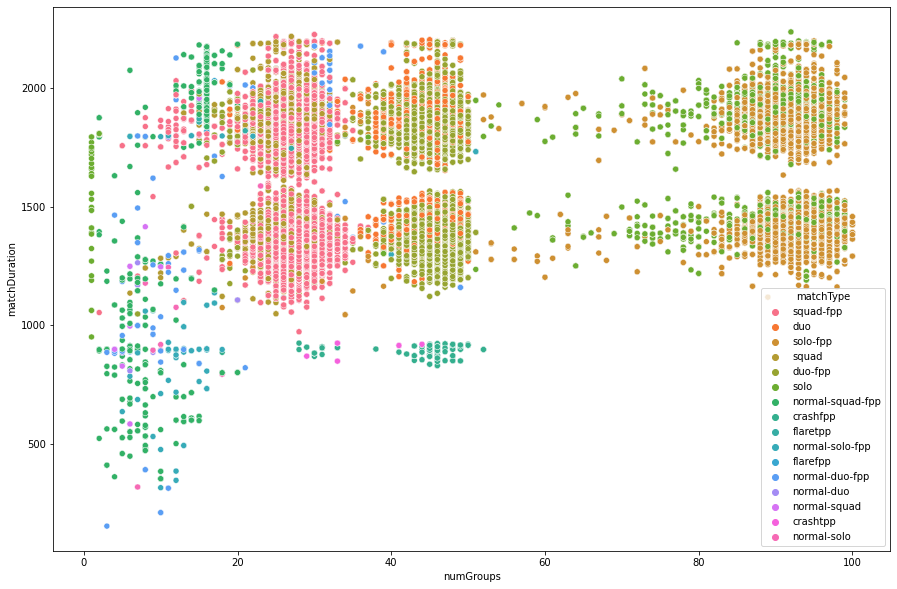

In [44]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data,x="numGroups",y="matchDuration",hue="matchType")

- Most of play Match Duration is Greater than 1000
- In the dataset Match Type 12 is a most playable match
- 20-30 group played normal-solo match Or crashtpp match
- 40-50 & 80 up group played duo,squad-fpp or normal-squad-fpp matchs

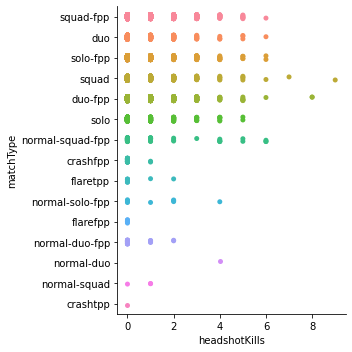

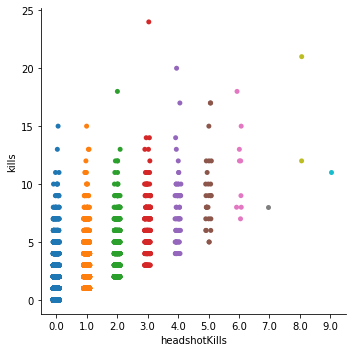

In [23]:
sns.catplot(data=data,y="matchType",x="headshotKills")
sns.catplot(data=data,y="kills",x="headshotKills")

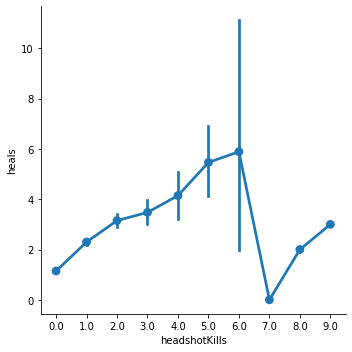

In [24]:
sns.factorplot(data=data,y="heals",x="headshotKills")

- heals increase positively the headshot also increase when has come to 5 then the headshot is decreased
- As per the above chart clearly see the headshot & heals have no correlation

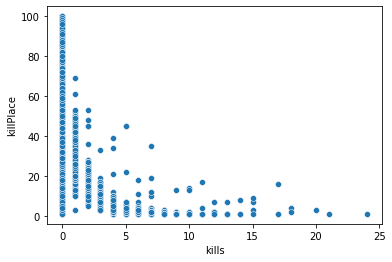

In [25]:
sns.scatterplot(data=data,y="killPlace",x="kills")

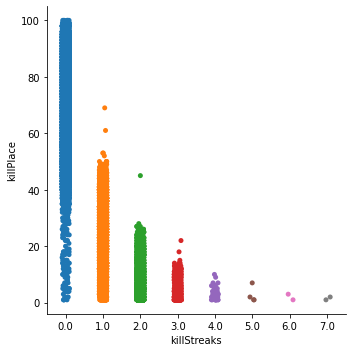

In [26]:
sns.catplot(data=data,y="killPlace",x="killStreaks")

**Remove Outlier's** 

In [29]:
# data[data["damageDealt"] < 2000]
# data[data["heals"] < 30]
# data[data["kills"] < 15]
# data[data["longestKill"] < 500]
# data[data["rankPoints"] < 3500]
# data[data["rideDistance"] < 15000]
# data[data["walkDistance"] < 10000]
# data[data["weaponsAcquired"] < 28]
# data[data["swimDistance"] < 900]

data = data.query("(damageDealt < 2000) & (heals < 30) & (kills <15) & (longestKill < 500) & (rankPoints < 15000) & (walkDistance <= 9000) & (weaponsAcquired < 28) & (swimDistance < 900)")

In [30]:
# Convert object data to int

encode = LabelEncoder()
data["matchType"] = encode.fit_transform(data["matchType"])

In [31]:
# Split data into dependent variable & target variable 

x = data.drop(["winPlacePerc"],axis=1)
y = data["winPlacePerc"]

In [32]:
# probability data convert to binary data
 
y = y.apply(lambda x : 1 if x >= 0.5 else 0)

In [33]:
# Scaling the data between 0 to 1

scale = StandardScaler()
x = scale.fit_transform(x)

# Model building

In [34]:
# Divide data into train & test

x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=10)

In [35]:
model_name = []
train_score = []
test_score = []

def run_model(model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  tr_score = model.score(x_train,y_train)
  te_score = model.score(x_test,y_test)
  model_name.append(model)
  train_score.append(tr_score)
  test_score.append(te_score)
  print(model)
  print("Train Score =", tr_score)
  print("Test Score  =", te_score)
  print(confusion_matrix(y_test,y_pred))

In [36]:
import xgboost as xgb

rd = RandomForestClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = xgb.XGBRFClassifier()

models = [rd,ad,gb,xgb]
for i in models:
  run_model(i)
  print("=======================")

RandomForestClassifier()
Train Score = 1.0
Test Score  = 0.9320305862361937
[[3443  252]
 [ 228 3139]]
AdaBoostClassifier()
Train Score = 0.9250814332247557
Test Score  = 0.9250920419144718
[[3439  256]
 [ 273 3094]]
GradientBoostingClassifier()
Train Score = 0.9366001038568663
Test Score  = 0.9320305862361937
[[3446  249]
 [ 231 3136]]
XGBRFClassifier()
Train Score = 0.9084643346079403
Test Score  = 0.9041348060039649
[[3450  245]
 [ 432 2935]]


- **Without Remove Outiler** GradientBoosting Score is 0.91
- **after Remove Outiler's** GradientBoosting Score is 0.93

- RandomForestClassifier model train score is greater than test scores so it's called overfitted model
- GradientBoostingClassifier has Best score achive
- Gradient Boosting classifiers is to **minimize the loss**, or the difference between the actual class value of the training example and the predicted class value.

# **Hyperparameter Tuning**

In [37]:
gbm = GradientBoostingClassifier()
param = {
    "loss":['log_loss', 'deviance', 'exponential'],
    "learning_rate": [0.1, 0.5, 0.01,0.03, 0.001],
     "n_estimators":[100,50,200,300,500],
     "subsample":[0.3,0.5,0.8,1.0],
     "criterion":['friedman_mse',"squared_error", "mse"], 
     "max_depth":[3,5],
     "min_impurity_decrease" :[0.0,0.01,0.1,0.001]
}

gb_cv = RandomizedSearchCV(gbm,param_distributions=param,cv=5,n_jobs=-1)
run_model(gb_cv)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse'],
                                        'learning_rate': [0.1, 0.5, 0.01, 0.03,
                                                          0.001],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_depth': [3, 5],
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.1, 0.001],
                                        'n_estimators': [100, 50, 200, 300,
                                                         500],
                                        'subsample': [0.3, 0.5, 0.8, 1.0]})
Train Score = 0.93513666619459
Test Score  = 0.931322571509

In [38]:
# Best Parameter for GradientBoost model

gb_cv.best_params_

{'subsample': 0.8,
 'n_estimators': 100,
 'min_impurity_decrease': 0.1,
 'max_depth': 5,
 'loss': 'exponential',
 'learning_rate': 0.03,
 'criterion': 'friedman_mse'}

- After apply Hyperparameter Tuning Score slightly increased

In [39]:
# Model Score Report

model_report = pd.DataFrame([model_name,train_score,test_score]).T
model_report.columns = ["model","train score","test score"]
model_report

,model,train score,test score
0,"(DecisionTreeClassifier(max_features='auto', r...",1.0,0.932031
1,"(DecisionTreeClassifier(max_depth=1, random_st...",0.925081,0.925092
2,([DecisionTreeRegressor(criterion='friedman_ms...,0.9366,0.932031
3,XGBRFClassifier(),0.908464,0.904135
4,"RandomizedSearchCV(cv=5, estimator=GradientBoo...",0.935137,0.931323


## Prediction

In [40]:
# Wining prediction probabilaty based on x_test data

pd.DataFrame(gb_cv.predict_proba(x_test))  

,0,1
0,0.026288,0.973712
1,0.993837,0.006163
2,0.253780,0.746220
3,0.995127,0.004873
4,0.024186,0.975814
...,...,...
7057,0.107951,0.892049
7058,0.992997,0.007003
7059,0.994263,0.005737
7060,0.864153,0.135847
